# Equation Samples
Here, we use an [equation sampler](https://github.com/AutoResearch/equation-sampler) to sample random equations and then use them as AutoRA experiment runners. This can be used in a closed loop to benchmark or train novel AutoRA Experimentalists or AutoRA Theorists.

First install the packages via pip:

In [1]:
!pip install "autora-synthetic-abstract-equation"
!pip install "equation-sampler"

Then import the `sample_equations, to_sympy` function to your project

In [2]:
from equation_sampler import sample_equations, to_sympy

Let's generate a sample equation using the Equation Sampler library. Please note that the Equation Sampler offers various settings for sampling, including priors. In this example, we will focus on using basic functionality. For more detailed information and options, you can refer to the Equation Sampler's [documentation]( https://github.com/AutoResearch/equation-sampler).






In [35]:

# First, we declare the operator and function space

functions = [ "sin", "cos","tan","exp","log","sqrt","abs"]

operators = ["+","-","*","/","^"]

# We also use a seed to get reproducable results:
import numpy as np
np.random.seed(42)

# then we can sample an equation:
equations = sample_equations(num_samples=4, max_depth=4, max_num_variables=2,
    max_num_constants=1,
    function_space=functions,
    operation_space=operators, verbose=False)

# Use a helper function to transform the equations from the sample_equation into sympy equations
sympy_equations_and_values = to_sympy(equations, functions, operators)

0 equations generated
all equations generated


Let's look at the equations:

In [ ]:
sympy_equations_and_values

There are added values, but we are only interested in the equations themselves:

In [36]:
sympy_equations = sympy_equations_and_values[0]
sympy_equations

[Abs(x_2/x_1), tan(exp(sin(x_1))), c_1*cos(x_1), x_1*x_2]

And then we can use the expression to create an autora experiment

In [38]:
from autora.experiment_runner.synthetic.abstract.equation import equation_experiment

# Let's pick the first one
expr = sympy_equations[0]

experiment = equation_experiment(expr)

Let's try some values for the experiment.

In [39]:
# First, import numpy
import numpy as np

# Declare a test input:
test_input = np.array([[1, 2],[3, 4],[5, 6],[7, 8],[9, 10]])

# Run the experiment with this input:
experiment.experiment_runner(test_input)

,x_1,x_2,observations
0,1.000305,1.998960,1.998351
1,3.000750,4.000941,1.333313
2,4.998049,5.998698,1.200208
3,7.000128,7.999684,1.142791
4,8.999983,9.999147,1.111018


To use the plotting we have to define a domain.

In [42]:
# Import from autora
from autora.variable import IV

# Describe the variables
variable_x_1 = IV(name="x_1", allowed_values=np.linspace(-10, 10, 100), value_range=(-10, 10))
variable_x_2 = IV(name="x_2", allowed_values=np.linspace(-10, 10, 100), value_range=(-10, 10))

# Reinitialize the experiment:
experiment = equation_experiment(expr, [variable_x_1, variable_x_2])

Now we can plot the ground truth

/usr/local/lib/python3.10/dist-packages/autora/experiment_runner/synthetic/abstract/sympy_equation/__init__.py:148: RuntimeWarning: Unnamed data is used. Arguments will be sorted alphabetically. Consider using a Pandas DataFrame with named columns for better clarity and ease of use.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

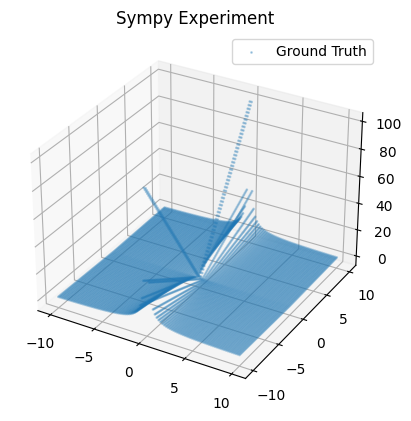

In [43]:
experiment.plotter()